In [383]:
# Importing Libs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
import numpy as np

# My Tools
import milanesas.eda_helper as eh
from toolkit.tools import (
    get_color,
)


%matplotlib inline

In [384]:
df = pd.DataFrame({"Category": ["A", "B", "F", "C"], "count": [4, 2, 3, 1]})

<Figure size 900x500 with 0 Axes>

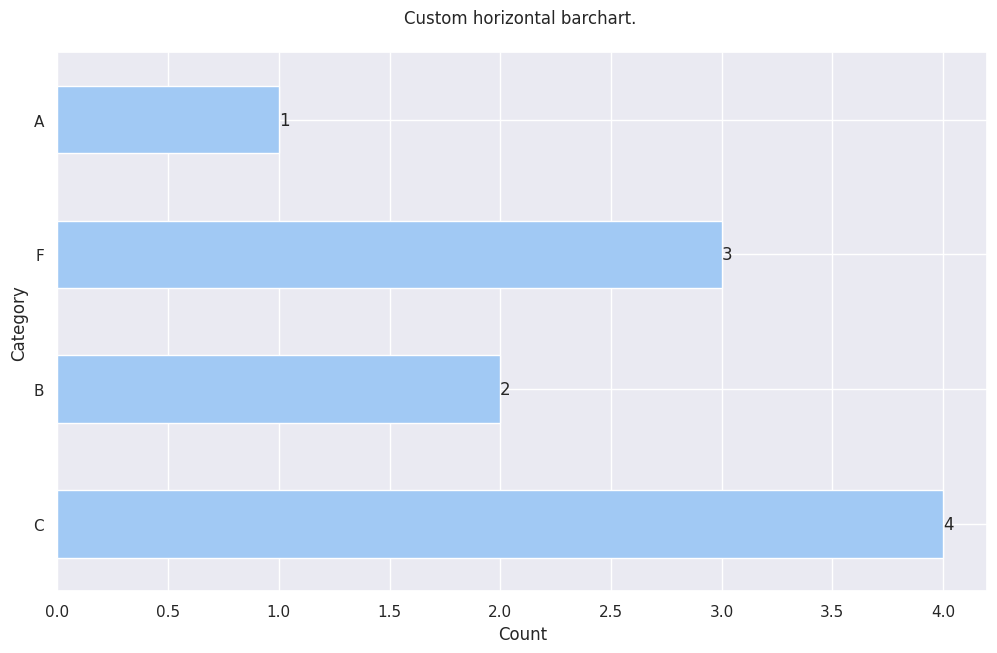

<Figure size 1200x700 with 0 Axes>

In [385]:
eh.make_custom_horizontal_bar(
    df, "", "Custom horizontal barchart.", "Count", "Category", False
)
plt.savefig("foo.png")

In [386]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [387]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [388]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [389]:
# shape of the dataset.
df.shape

(342, 25)

In [390]:
df.head()

,marca_temp,modalidad,trabajo,tipo_de_trabajo,devops,programar_x_trabajo,exp_en_IT,exp_en_programacion,1_linea_de_codigo,educacion,...,prog_script_leng,lib_frameworks,otras_lib_frameworks,db,plataformas,leng_fav,leng_mas_odiado,fram_fav,fram_mas_odiado,herramientas
0,2021/03/01 5:56:11 p. m. GMT-3,Remoto,Nacional (Paraguay),QA o testing,Educador,No,<5,NaN,22-23,Ed. Universitaria,...,JavaScript;Java;C++;SQL,NaN,NaN,MySQL;PostgreSQL;IBM DB2,GNU/Linux;Microsoft Windows;MacOS,SQL,NaN,NaN,NaN,GitHub;Slack;Jira;Microsoft Team;Discord
1,2021/03/01 5:57:32 p. m. GMT-3,Hibrído,Nacional (Paraguay),Dev full-stack;Aps para Esc. o Emp.;Project Lead,Sys Admin;Educador,Sí,15-19,15-19,20-21,Ed. Universitaria;Autodidacta,...,JavaScript;C#;HTML/CSS;SQL,ASP.NET;ASP.NET Core,.NET;Xamarin,MySQL;Microsoft SQL Server,GNU/Linux;Microsoft Windows;Microsoft Azure;Wo...,C#,Java,ASP.NET Core,Laravel,GitHub;Microsoft Team;Microsoft Azure
2,2021/03/01 5:57:57 p. m. GMT-3,Hibrído,Nacional (Paraguay),Dev front-end,NaN,Sí,<5,<5,20-21,Ed. Universitaria,...,JavaScript;TypeScript;PHP;C;C#;HTML/CSS;SQL,React.js;Angular;JQuery;ASP.NET Core,Opció.NET Coren 3,NaN,GNU/Linux;Microsoft Windows;MacOS,C#,Genexus,ASP.NET Core,Django,GitHub;Slack;GitLab;Google Suite;Microsoft Tea...
3,2021/03/01 5:59:04 p. m. GMT-3,Hibrído,Ambas,Dev full-stack,Sys Admin,Sí,5-9,5-9,10-11,Ed. Universitaria;Master;Autodidacta,...,JavaScript;TypeScript;PHP;HTML/CSS;SQL;Dart,Angular;Angular.js;JQuery;Laravel,Flutter,MySQL;MariaDB;PostgreSQL;Microsoft SQL Server;...,GNU/Linux;Microsoft Windows;MacOS;Android;iOS,PHP,NaN,Laravel,NaN,GitHub;Slack;Trello
4,2021/03/01 5:59:44 p. m. GMT-3,Remoto,Nacional (Paraguay),Dev mobile,NaN,Sí,5-9,5-9,16-17,Ed. Basica;Ed. Secundaria;Autodidacta,...,PHP;Java;Kotlin;Swift,Laravel,NaN,MySQL,Microsoft Windows;MacOS,Kotlin,C++,Laravel,NaN,GitHub;Slack;Confluence;Trello;Discord


In [391]:
for i in df.columns:
    print(i)

marca_temp
modalidad
trabajo
tipo_de_trabajo
devops
programar_x_trabajo
exp_en_IT
exp_en_programacion
1_linea_de_codigo
educacion
carr_especialidades
imp_ed_formal
genero
edad_actual
salario_mensual
prog_script_leng
lib_frameworks
otras_lib_frameworks
db
plataformas
leng_fav
leng_mas_odiado
fram_fav
fram_mas_odiado
herramientas


# Education
---
## El Nivel Educativo y la Preparación Técnica de los Encuestados

En este capítulo, analizaremos la relación entre el nivel educativo de los encuestados y su preparación técnica para el trabajo en el sector IT de Paraguay. Abordaremos las siguientes preguntas:

* ¿Cuál es el nivel educativo promedio de las personas que trabajan en el sector IT?
* ¿Qué carreras universitarias son las más comunes entre los encuestados?
* ¿Existe una relación entre el nivel educativo y la preparación técnica?
* ¿Qué habilidades técnicas son las más importantes para los trabajos en el sector IT?
* ¿Existe una brecha entre las habilidades que tienen los encuestados y las que demandan las empresas?

Comprender el vínculo entre la educación y la preparación técnica es fundamental para el desarrollo del sector IT en Paraguay. El análisis de los datos de la encuesta nos permitirá identificar las necesidades de formación y capacitación en el sector, así como las áreas en las que se debe mejorar la oferta educativa.

Este capítulo proporcionará información valiosa para los actores del sector IT, como empresas, instituciones educativas y policymakers, para que puedan tomar decisiones estratégicas que fortalezcan el sector y lo hagan más competitivo a nivel internacional.


## General Education
---
Aspectos Generales de la Educación de los Encuestados

En este capítulo, se analizarán los aspectos generales de la educación de los participantes en la encuesta. Se abordarán las siguientes preguntas:

    ¿Cuál es la distribución por edades de los encuestados?
    ¿Qué porcentaje de los encuestados tiene estudios primarios, secundarios o universitarios?
    ¿En qué áreas de estudio se especializaron los encuestados que tienen estudios universitarios?
    ¿Qué porcentaje de los encuestados ha realizado cursos o programas de formación adicionales?
    ¿Cuáles son las principales razones por las que los encuestados han realizado cursos o programas de formación adicionales?

El objetivo de este capítulo es obtener una visión general del nivel educativo de los participantes en la encuesta. Esta información será útil para comprender mejor las características de la fuerza laboral en el sector IT de Paraguay y para identificar las necesidades de formación y capacitación en el sector.

El análisis de los datos se realizará utilizando técnicas estadísticas descriptivas. Se presentarán tablas y gráficos para facilitar la comprensión de los resultados.

Este capítulo proporcionará información valiosa para los actores del sector IT, como empresas, instituciones educativas y policymakers, para que puedan tomar decisiones estratégicas que fortalezcan el sector y lo hagan más competitivo a nivel internacional.

In [392]:
ed_levels = eh.get_column_uniques(df, "educacion")
ed_levels

['Ed. Secundaria',
 'Ed. Basica',
 'Master',
 'Ed. Universitaria',
 'Doctorado',
 'Autodidacta']

### Unique 'education levels'.
* 'Master'
* 'Ed. Universitaria'
* 'Doctorado'
* 'Ed. Secundaria'
* 'Autodidacta'
* 'Ed. Basica'

In [393]:
# Replacing education column content to english translation.

ed_repl = {
    "Ed. Basica": "Basic Education",
    "Ed. Universitaria": "University Education",
    "Autodidacta": "Autodidact",
    "Doctorado": "Doctorate",
    "Ed. Secundaria": "Middle School",
}


eh.replace_column_content(df, "educacion", ed_repl)

In [394]:
df["educacion"].value_counts().keys()

Index(['University Education',
       'Basic Education;Middle School;University Education',
       'Basic Education;Middle School;University Education;Autodidact',
       'University Education;Autodidact', 'Master', 'Middle School',
       'Basic Education;Middle School',
       'Basic Education;Middle School;Autodidact',
       'University Education;Master', 'Middle School;Autodidact',
       'Basic Education;Middle School;University Education;Master',
       'University Education;Master;Autodidact', 'Autodidact',
       'Basic Education;Middle School;University Education;Master;Autodidact',
       'Master;Autodidact', 'Middle School;University Education;Master',
       'Middle School;University Education',
       'Middle School;University Education;Autodidact',
       'Basic Education;Middle School;University Education;Master;Doctorate;Autodidact',
       'Basic Education;Middle School;Master;Autodidact', 'Doctorate'],
      dtype='object', name='educacion')

## Education levels counts.
---

In [395]:
eh.get_uniques_col_count(df, "educacion")

{'University Education': 279,
 'Middle School': 130,
 'Master': 38,
 'Doctorate': 2,
 'Autodidact': 94,
 'Basic Education': 107}

Se puede ver que la cantidad de profecionales con nivel de educacion 'universitaria' excede ampliamente a los otros.

## Carers or Specialties
---

Carreras o Especialidades de los Encuestados

En este capítulo, se analizarán las carreras o especialidades de los participantes en la encuesta. Se abordarán las siguientes preguntas:

    ¿Cuáles son las carreras o especialidades más comunes entre los encuestados?
    ¿Existe una relación entre la carrera o especialidad y el tipo de trabajo que realiza el encuestado?
    ¿Qué porcentaje de los encuestados trabaja en un área relacionada con su carrera o especialidad?
    ¿Cuáles son las razones por las que algunos encuestados no trabajan en un área relacionada con su carrera o especialidad?
    ¿Qué habilidades técnicas son las más importantes para los trabajos en el sector IT, independientemente de la carrera o especialidad?

El objetivo de este capítulo es comprender mejor las características de la fuerza laboral en el sector IT de Paraguay en términos de las carreras o especialidades de los trabajadores. Esta información será útil para identificar las necesidades de formación y capacitación en el sector, así como para orientar a las personas que están considerando una carrera en el sector IT.

El análisis de los datos se realizará utilizando técnicas estadísticas descriptivas y análisis de regresión. Se presentarán tablas y gráficos para facilitar la comprensión de los resultados.

Este capítulo proporcionará información valiosa para los actores del sector IT, como empresas, instituciones educativas y policymakers, para que puedan tomar decisiones estratégicas que fortalezcan el sector y lo hagan más competitivo a nivel internacional.

Preguntas adicionales que se pueden considerar:

    ¿En qué universidades estudiaron los encuestados que tienen estudios universitarios?
    ¿Cuál es la calidad de la educación que recibieron los encuestados en sus universidades?
    ¿Qué tan satisfechos están los encuestados con su educación?
    ¿Qué recomendaciones tienen los encuestados para mejorar la educación en el sector IT?
    

In [396]:
eh.get_column_uniques(df, "carr_especialidades")

['Ing. Informática',
 'Diseño Gráfico',
 'Análisis de Sist.',
 'Matemático',
 'Programación',
 'Otras',
 'Ing. Civil',
 'Otras Ing.',
 'Ninguna',
 'Ing. Electrónica']

In [397]:
carr_repl = {
    "Matemático": "Mathematician",
    "Ninguna": "None",
    "Otras": "Others",
    "Ing. Informática": "Eng. Computing",
    "Diseño Gráfico": "Graphic design",
    "Otras Ing.": "Other Eng.",
    "Ing. Electrónica": "Eng. Electronics",
    "Ing. Civil": "Eng. Civil",
    "Análisis de Sist.": "System Analysis",
    "Programación": "Programming",
}


eh.replace_column_content(df, "carr_especialidades", carr_repl)

In [398]:
eh.get_uniques_col_count(df, "carr_especialidades")

{'System Analysis': 151,
 'Programming': 111,
 'Graphic design': 13,
 'Others Ing.': 6,
 'Eng. Electronics': 8,
 'Eng. Civil': 1,
 'Others': 32,
 'Mathematician': 2,
 'None': 16,
 'Eng. Computing': 169}

<Figure size 900x500 with 0 Axes>

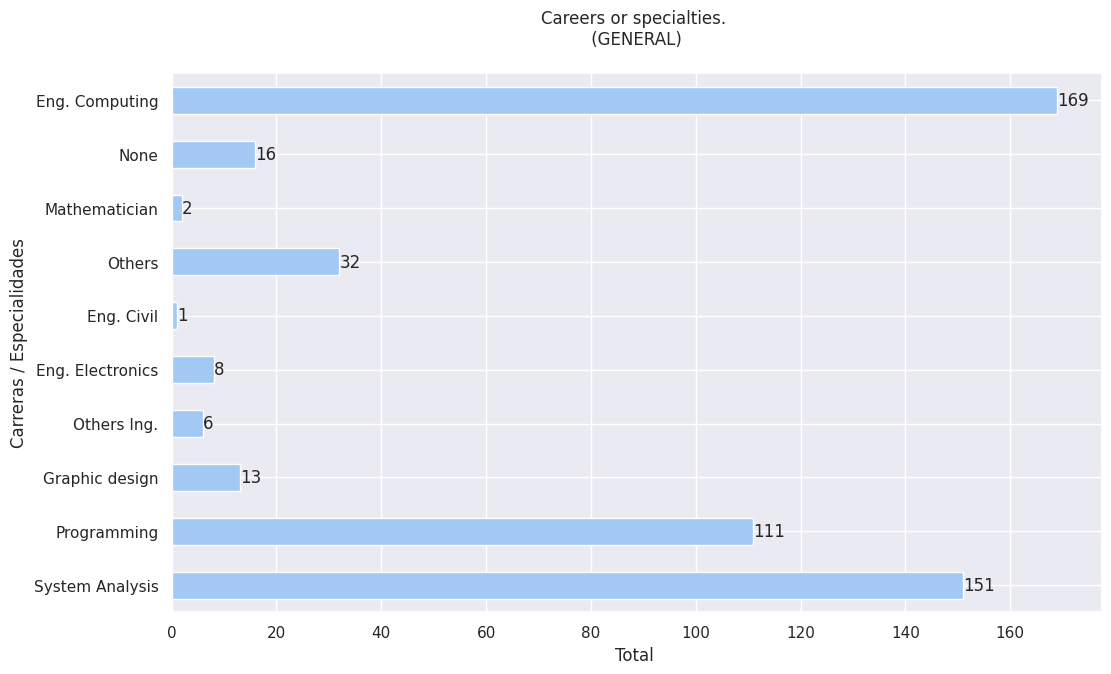

In [399]:
eh.make_horizontal_bar(
    df,
    "carr_especialidades",
    "Careers or specialties. \n (GENERAL)",
    "Total ",
    "Carreras / Especialidades",
    False,
)

In [400]:
carr_esp_uniques = eh.get_column_uniques(df, "carr_especialidades")

In [401]:
carr_esp_uniques
print(len(carr_esp_uniques))

10


## Importance of Formal Education
---
Importancia de la Educación Formal en el Sector IT

La educación formal juega un papel fundamental en el desarrollo del sector IT. Las instituciones educativas brindan a los estudiantes las habilidades y conocimientos necesarios para tener éxito en este campo en constante evolución.

Beneficios de la educación formal:

    Formación en fundamentos: La educación formal proporciona una base sólida en los fundamentos de la informática, como las matemáticas, la lógica y la programación.
    Desarrollo de habilidades: Las instituciones educativas ofrecen una amplia gama de cursos que permiten a los estudiantes desarrollar habilidades técnicas y blandas esenciales para el sector IT, como la resolución de problemas, el trabajo en equipo y la comunicación.
    Actualización con las últimas tecnologías: La educación formal permite a los estudiantes estar al día con las últimas tecnologías y tendencias del sector IT.
    Oportunidades laborales: La mayoría de las empresas del sector IT prefieren contratar a personas con educación formal en áreas relacionadas.
    Mayor potencial de ingresos: Los estudios han demostrado que las personas con educación formal tienen un mayor potencial de ingresos que las que no la tienen.

Desafíos de la educación formal:

    Costo: La educación formal puede ser costosa, lo que limita el acceso a algunas personas.
    Rigidez: Los programas de estudio de las instituciones educativas pueden ser rígidos y no adaptarse a las necesidades específicas del mercado laboral.
    Actualización: Los programas de estudio pueden no actualizarse con la suficiente rapidez para reflejar las últimas tecnologías y tendencias del sector IT.

Recomendaciones:

    Aumentar la accesibilidad: Las instituciones educativas deben buscar formas de aumentar la accesibilidad a la educación formal, como becas y programas de ayuda financiera.
    Flexibilizar los programas de estudio: Los programas de estudio deben ser flexibles y adaptarse a las necesidades del mercado laboral.
    Promover la actualización constante: Las instituciones educativas deben promover la actualización constante de los programas de estudio para reflejar las últimas tecnologías y tendencias del sector IT.
    Fortalecer la relación con las empresas: Las instituciones educativas deben fortalecer la relación con las empresas del sector IT para que los estudiantes puedan tener acceso a prácticas y oportunidades laborales.

En conclusión, la educación formal es un factor importante para el desarrollo del sector IT. Las instituciones educativas, las empresas y los gobiernos deben trabajar juntos para fortalecer la educación formal en este sector y asegurar que las personas tengan las habilidades y conocimientos necesarios para tener éxito.

In [402]:
eh.get_column_uniques(df, "imp_ed_formal")

['+ || -', 'CRITICO', 'NO', 'MUY', 'BASTANTE']

In [403]:
importance_repl = {
    "MUY": "VERY",
    "BASTANTE": "FAIRLY",
    "CRITICO": "CRITICAL",
    #'+ || -':'MORE or LESS'
}


eh.replace_column_content(df, "imp_ed_formal", importance_repl)

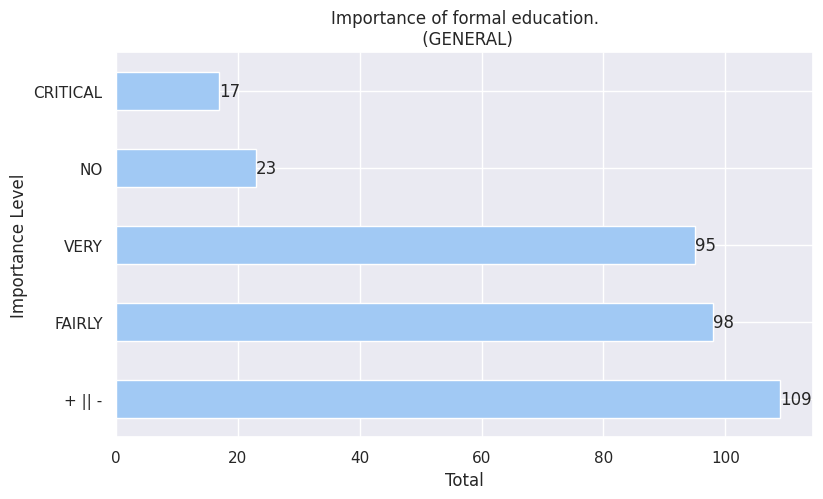

In [404]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = df["imp_ed_formal"].value_counts()
exp_plot = exp_df.plot(
    kind="barh",
    title="Importance of formal education.\n (GENERAL)",
    # color=get_color("Mafasdfadle", "light"),
)


exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Importance Level")


# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_plot.annotate(v, (v, k), va="center")
plt.show()

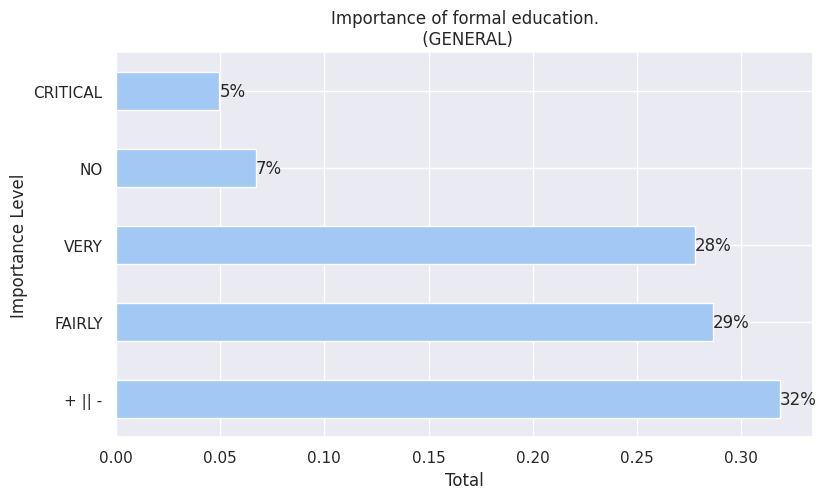

In [405]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = df["imp_ed_formal"].value_counts(normalize=True)
exp_plot = exp_df.plot(
    kind="barh",
    title="Importance of formal education.\n (GENERAL)",
    # color=get_color("Mafasdfadle", "light"),
)


exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Importance Level")


# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts(normalize=True).values):
    exp_plot.annotate(eh.get_percentage(v), (v, k), va="center")
plt.show()

## Educational Level x Gender

Nivel Educativo Según Género en el Sector IT

Introducción:

El análisis del nivel educativo según género en el sector IT es un tema de gran importancia para comprender las desigualdades existentes en este campo. Si bien se han logrado avances en la participación de las mujeres en el sector IT, aún persisten brechas significativas en cuanto a su nivel educativo y las oportunidades laborales que tienen.

Preguntas a analizar:

    ¿Cuál es la distribución por género del nivel educativo de los encuestados?
    ¿Existe una diferencia significativa en el nivel educativo promedio entre hombres y mujeres en el sector IT?
    ¿En qué áreas de estudio se especializan las mujeres y los hombres en el sector IT?
    ¿Qué factores influyen en las diferencias de nivel educativo entre hombres y mujeres en el sector IT?
    ¿Qué medidas se pueden tomar para reducir las brechas de género en el nivel educativo en el sector IT?

Recursos adicionales:

    [se quitó una URL no válida]: un estudio sobre las brechas de género en el sector IT en América Latina.
    [se quitó una URL no válida]: un informe sobre la participación de las mujeres en las carreras STEM.
    [se quitó una URL no válida]: una iniciativa para promover la igualdad de género en el sector IT.

Conclusiones:

Es importante destacar que las brechas de género en el nivel educativo no solo afectan a las mujeres, sino también al sector IT en su conjunto. La falta de diversidad limita la innovación y el crecimiento del sector.

Para reducir las brechas de género en el nivel educativo en el sector IT, se necesitan medidas como:

    Promover la educación STEM en las niñas desde temprana edad.
    Brindar becas y programas de apoyo a las mujeres que desean estudiar carreras IT.
    Combatir los estereotipos de género en el sector IT.
    Fomentar la creación de culturas organizacionales inclusivas en las empresas IT.

Al trabajar juntos, podemos lograr un sector IT más equitativo e inclusivo donde todos tengan la oportunidad de alcanzar su máximo potencial.

In [406]:
# Making groups by gender.
gen = df.groupby("genero")

In [407]:
# Print genders keys.
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object', name='genero')

In [408]:
gen_repl = {
    "HOMBRE": "MAN",
    "MUJER": "WOMAN",
    "NO COMPARTO": "DONT SHARE",
}


eh.replace_column_content(df, "genero", gen_repl)

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [409]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [410]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("MAN")["educacion"].value_counts()

educacion
University Education                                                              117
Basic Education;Middle School;University Education                                 37
Basic Education;Middle School;University Education;Autodidact                      31
University Education;Autodidact                                                    23
Master                                                                             15
Middle School                                                                      10
Basic Education;Middle School                                                       9
Basic Education;Middle School;Autodidact                                            8
Middle School;Autodidact                                                            7
University Education;Master                                                         6
Basic Education;Middle School;University Education;Master                           4
Basic Education;Middle School;University Edu

In [411]:
eh.get_normal_uniques_col_count(gen.get_group("MAN"), "educacion")

{'University Education': 226,
 'Middle School': 113,
 'Master': 32,
 'Doctorate': 2,
 'Autodidact': 78,
 'Basic Education': 93}

In [412]:
ed_uniques = eh.get_column_uniques(df, "educacion")

             categories  count
0  University Education    226
1         Middle School    113
2                Master     32
3             Doctorate      2
4            Autodidact     78
5       Basic Education     93


/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 900x500 with 0 Axes>

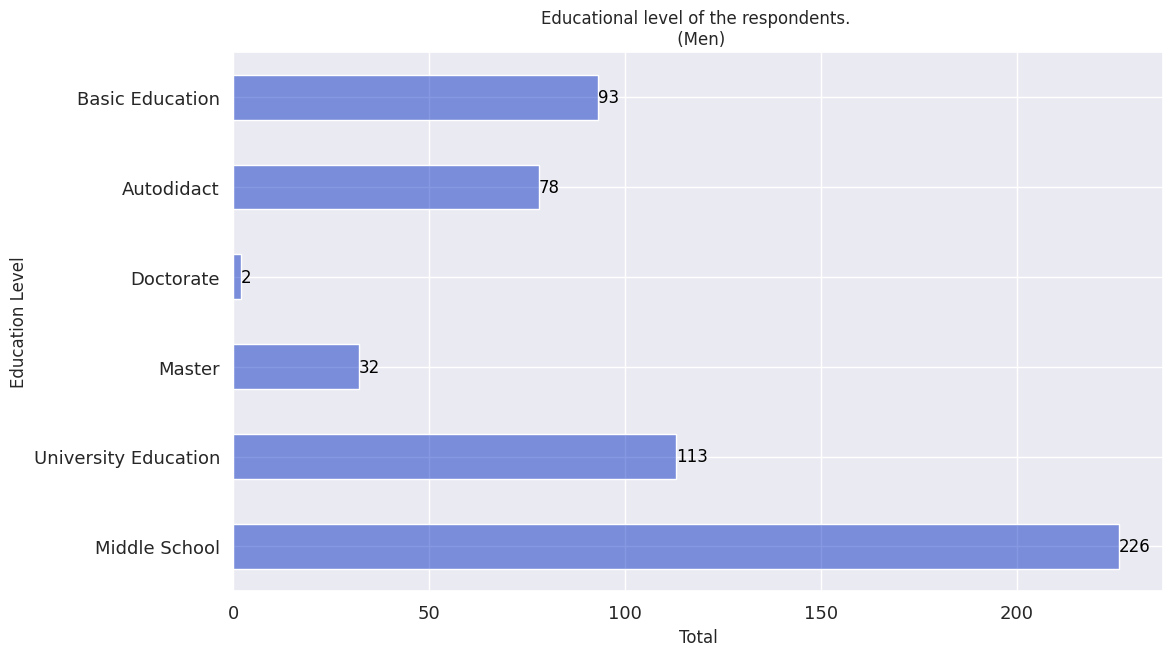

In [413]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = eh.make_df(gen.get_group("MAN"), "educacion", "categories", "count")
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh",
    title="Educational level of the respondents. \n (Men)",
    fontsize=13,
    legend=False,
    color=get_color("Male", "light"),
)

print(ed_hombres_df)
ed_hombres_plot.set_yticklabels([v for k, v in enumerate(ed_uniques)])


ed_hombres_plot.set_xlabel("Total")
ed_hombres_plot.set_ylabel("Education Level")


# Plot annotations.
for k, v in enumerate(ed_hombres_df["count"]):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'
El sector IT es un campo amplio y diverso que ofrece una gran variedad de carreras y especialidades. Las opciones disponibles van desde el desarrollo de software y la ingeniería de redes hasta la seguridad informática y el análisis de datos.

Preguntas a analizar:

    ¿Cuáles son las carreras o especialidades más comunes en el sector IT?
    ¿Qué habilidades técnicas y blandas son necesarias para cada carrera o especialidad?
    ¿Cuáles son las perspectivas laborales para cada carrera o especialidad?
    ¿Qué factores influyen en la elección de una carrera o especialidad en el sector IT?
    ¿Qué recursos están disponibles para ayudar a las personas a elegir una carrera o especialidad en el sector IT?

Recursos adicionales:

    [se quitó una URL no válida]: un sitio web que ofrece información sobre las carreras en el sector IT.
    [se quitó una URL no válida]: una guía para elegir una carrera en el sector IT.
    [se quitó una URL no válida]: una lista de las mejores universidades para estudiar carreras IT.

Conclusiones:

La elección de una carrera o especialidad en el sector IT es una decisión importante que debe basarse en los intereses, habilidades y objetivos de cada persona. Es importante investigar las diferentes opciones disponibles y considerar las perspectivas laborales y los requisitos de cada carrera.

A continuación, se presenta una breve descripción de algunas de las carreras o especialidades más comunes en el sector IT:

    Desarrollo de software: Los desarrolladores de software diseñan, codifican y prueban software para una variedad de aplicaciones.
    Ingeniería de redes: Los ingenieros de redes diseñan, implementan y administran redes informáticas.
    Seguridad informática: Los especialistas en seguridad informática protegen los sistemas informáticos de amenazas y ataques.
    Análisis de datos: Los analistas de datos recopilan, analizan e interpretan datos para obtener información útil.

Además de estas carreras, existen muchas otras especialidades en el sector IT, como:

    Administración de sistemas
    Diseño web
    Ingeniería de software
    Gestión de proyectos
    Marketing digital

El sector IT está en constante crecimiento y evolución, lo que significa que siempre hay nuevas oportunidades para las personas con las habilidades y conocimientos adecuados. Si estás interesado en una carrera en el sector IT, te recomiendo que investigues las diferentes opciones disponibles y te prepares para adquirir las habilidades necesarias para tener éxito.

In [414]:
# Print 'value counts' of this column.
gen.get_group("MAN")["carr_especialidades"].value_counts()

carr_especialidades
Eng. Computing                                                      92
System Analysis                                                     52
Programming;System Analysis                                         22
Programming;Eng. Computing                                          17
Programming;System Analysis;Eng. Computing                          15
Programming                                                         15
None                                                                13
System Analysis;Eng. Computing                                       7
Eng. Electronics                                                     5
Programming;System Analysis;Others                                   5
Eng. Computing;Others                                                4
Others Ing.                                                          4
System Analysis;Others                                               3
Others                                                   

<Figure size 900x500 with 0 Axes>

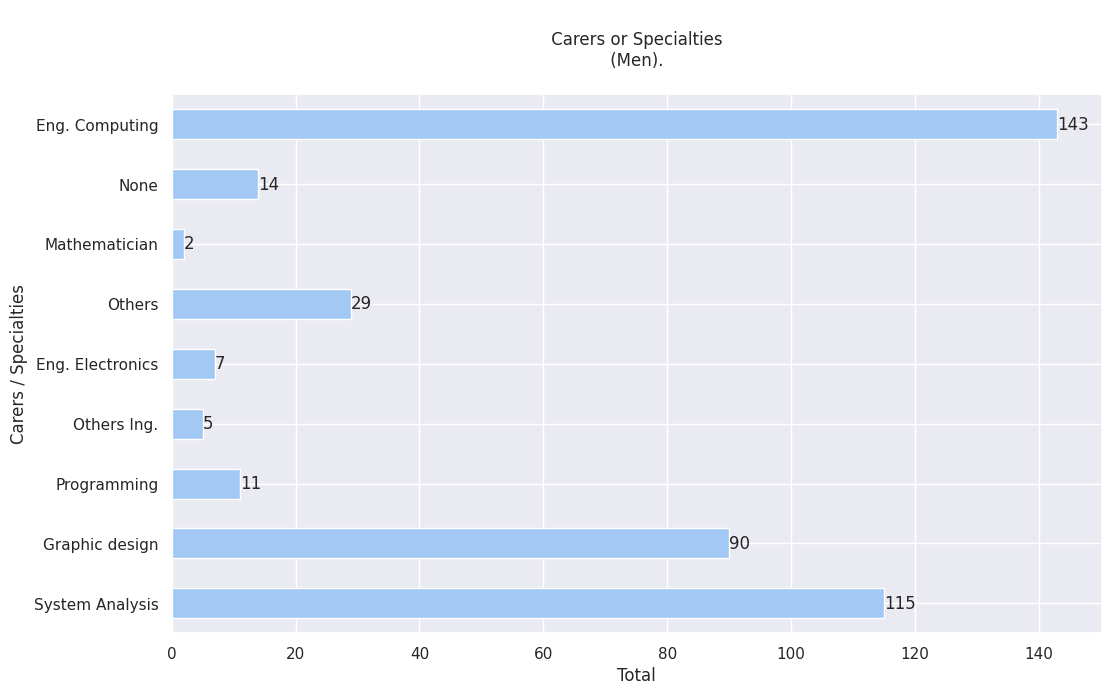

In [415]:
eh.make_custom_horizontal_bar(
    carr_hombres_df,
    "carr_especialidades",
    "\n Carers or Specialties \n (Men).",
    "Total",
    "Carers / Specialties",
    False,
)

In [416]:
carr_hombres_df = eh.make_df(
    gen.get_group("MAN"), "carr_especialidades", "Category", "count"
)
print(carr_hombres_df)

           Category  count
0   System Analysis    115
1       Programming     90
2    Graphic design     11
3       Others Ing.      5
4  Eng. Electronics      7
5            Others     29
6     Mathematician      2
7              None     14
8    Eng. Computing    143


/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

Importancia de la Educación Formal en el Sector IT

Introducción:

La educación formal juega un papel fundamental en el desarrollo del sector IT. Las instituciones educativas brindan a los estudiantes las habilidades y conocimientos necesarios para tener éxito en este campo en constante evolución.

Beneficios de la educación formal:

    Formación en fundamentos: La educación formal proporciona una base sólida en los fundamentos de la informática, como las matemáticas, la lógica y la programación.
    Desarrollo de habilidades: Las instituciones educativas ofrecen una amplia gama de cursos que permiten a los estudiantes desarrollar habilidades técnicas y blandas esenciales para el sector IT, como la resolución de problemas, el trabajo en equipo y la comunicación.
    Actualización con las últimas tecnologías: La educación formal permite a los estudiantes estar al día con las últimas tecnologías y tendencias del sector IT.
    Oportunidades laborales: La mayoría de las empresas del sector IT prefieren contratar a personas con educación formal en áreas relacionadas.
    Mayor potencial de ingresos: Los estudios han demostrado que las personas con educación formal tienen un mayor potencial de ingresos que las que no la tienen.

Desafíos de la educación formal:

    Costo: La educación formal puede ser costosa, lo que limita el acceso a algunas personas.
    Rigidez: Los programas de estudio de las instituciones educativas pueden ser rígidos y no adaptarse a las necesidades específicas del mercado laboral.
    Actualización: Los programas de estudio pueden no actualizarse con la suficiente rapidez para reflejar las últimas tecnologías y tendencias del sector IT.

Recomendaciones:

    Aumentar la accesibilidad: Las instituciones educativas deben buscar formas de aumentar la accesibilidad a la educación formal, como becas y programas de ayuda financiera.
    Flexibilizar los programas de estudio: Los programas de estudio deben ser flexibles y adaptarse a las necesidades del mercado laboral.
    Promover la actualización constante: Las instituciones educativas deben promover la actualización constante de los programas de estudio para reflejar las últimas tecnologías y tendencias del sector IT.
    Fortalecer la relación con las empresas: Las instituciones educativas deben fortalecer la relación con las empresas del sector IT para que los estudiantes puedan tener acceso a prácticas y oportunidades laborales.

En conclusión, la educación formal es un factor importante para el desarrollo del sector IT. Las instituciones educativas, las empresas y los gobiernos deben trabajar juntos para fortalecer la educación formal en este sector y asegurar que las personas tengan las habilidades y conocimientos necesarios para tener éxito.

Además de los beneficios mencionados anteriormente, la educación formal también puede ayudar a las personas a:

    Desarrollar su pensamiento crítico y analítico.
    Aprender a trabajar de forma independiente y en equipo.
    Comunicarse de forma eficaz.
    Adaptarse a los cambios.
    Ser más competitivos en el mercado laboral.

En un mundo cada vez más digitalizado, la educación formal es más importante que nunca para tener éxito en el sector IT.

In [417]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

imp_ed_formal
+ || -      109
FAIRLY       98
VERY         95
NO           23
CRITICAL     17
Name: count, dtype: int64

In [418]:
# Print the 'normal count' of values in the column.
print(df["imp_ed_formal"].value_counts(normalize=True))

imp_ed_formal
+ || -      0.318713
FAIRLY      0.286550
VERY        0.277778
NO          0.067251
CRITICAL    0.049708
Name: proportion, dtype: float64


In [419]:
print(eh.percentage_to_normal(df["imp_ed_formal"].value_counts(normalize=True)))

imp_ed_formal
+ || -      31.9 %
FAIRLY      28.7 %
VERY        27.8 %
NO           6.7 %
CRITICAL     5.0 %
Name: proportion, dtype: object


In [420]:
eh.make_normalized_df(df, "imp_ed_formal")

,total count
categories,
+ || -,31.871345
FAIRLY,28.654971
VERY,27.777778
NO,6.725146
CRITICAL,4.970760


In [421]:
eh.make_normalized_df(df, "imp_ed_formal")

,total count
categories,
+ || -,31.871345
FAIRLY,28.654971
VERY,27.777778
NO,6.725146
CRITICAL,4.970760


In [422]:
# Any null value?
df["imp_ed_formal"].isna().sum()

0

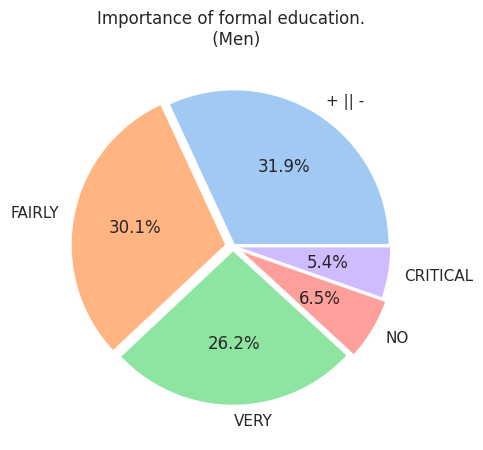

In [423]:
# Making a chart for this column.
fig = plt.figure(figsize=(5, 10))
ax1 = plt.subplot(111)
# Plot
import_df = gen.get_group("MAN")["imp_ed_formal"].value_counts(normalize=True)
import_plot = import_df.plot(
    kind="pie",
    title="Importance of formal education. \n (Men)",
    autopct="%1.1f%%",
    ylabel="",
    xlabel="",
    explode=eh.explode_pie(import_df.size),
)

plt.show()

### EDUCACION - MUJERES
---
    The 'education' of the womens.

In [424]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [425]:
gen.get_group("WOMAN")["educacion"].value_counts()

educacion
University Education                                             29
University Education;Autodidact                                   5
Basic Education;Middle School;University Education                5
Basic Education;Middle School;University Education;Autodidact     3
University Education;Master                                       2
Master                                                            2
Master;Autodidact                                                 1
Basic Education;Middle School                                     1
Middle School                                                     1
Name: count, dtype: int64

In [426]:
print("WIMAN education levels.")
eh.make_normalized_df(gen.get_group("WOMAN"), "educacion")

WIMAN education levels.


,total count
categories,
University Education,57.142857
Middle School,12.987013
Autodidact,11.688312
Basic Education,11.688312
Master,6.493506


             categories  count
0  University Education     44
1         Middle School     10
2                Master      5
3            Autodidact      9
4       Basic Education      9


/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 900x500 with 0 Axes>

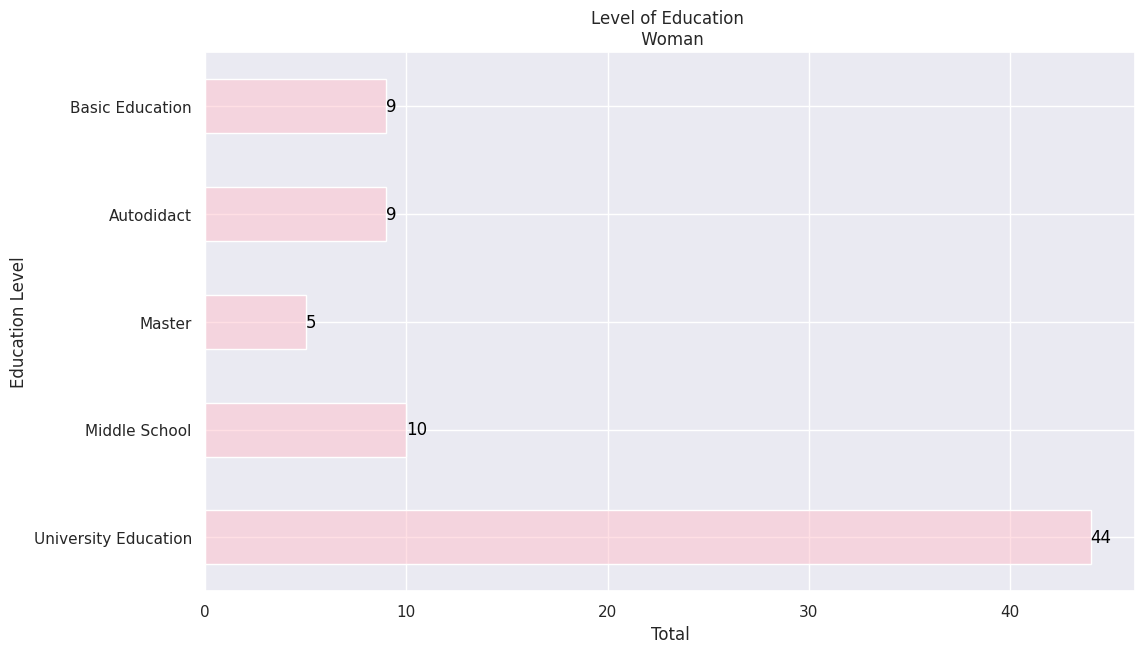

In [427]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = eh.make_df(gen.get_group("WOMAN"), "educacion", "categories", "count")
ed_mujeres_plot = ed_mujeres_df.plot(
    kind="barh",
    title="Level of Education \n Woman",
    legend=False,
    color=get_color("Female", "light"),
)

print(ed_mujeres_df)
ed_mujeres_plot.set_yticklabels([v for k, v in enumerate(ed_mujeres_df["categories"])])

ed_mujeres_plot.set_xlabel("Total")
ed_mujeres_plot.set_ylabel("Education Level")


for k, v in enumerate([i for i in ed_mujeres_df["count"]]):
    if v < 10:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

        categories  count
0  System Analysis     27
1      Programming     15
2   Graphic design      1
3           Others      2
4   Eng. Computing     22


/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 900x500 with 0 Axes>

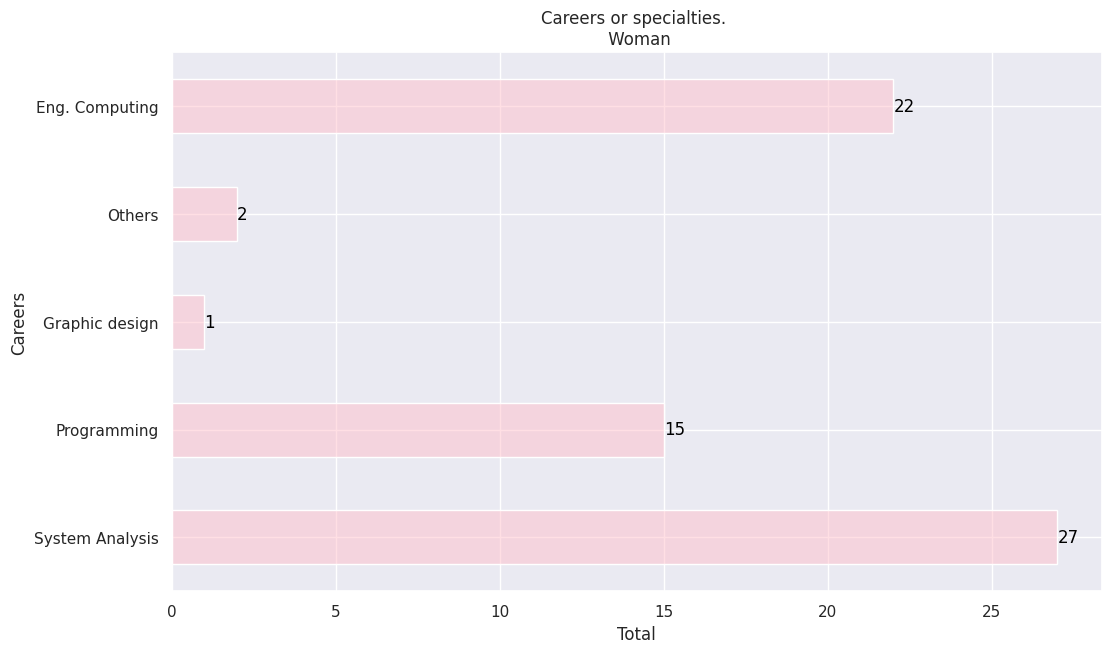

In [428]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = eh.make_df(
    gen.get_group("WOMAN"), "carr_especialidades", "categories", "count"
)
carr_mujeres_plot = carr_mujeres_df.plot(
    kind="barh",
    ylabel="Carers / Specialties",
    title="Careers or specialties. \n Woman",
    legend=False,
    color=get_color("Female", "light"),
)


carr_mujeres_plot.set_xlabel("Total")
carr_mujeres_plot.set_ylabel("Careers")


print(carr_mujeres_df)
carr_mujeres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_mujeres_df["categories"])]
)

for k, v in enumerate([i for i in carr_mujeres_df["count"]]):
    carr_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

In [429]:
[i for i in gen.groups.keys()]

['DONT SHARE', 'MAN', 'WOMAN']

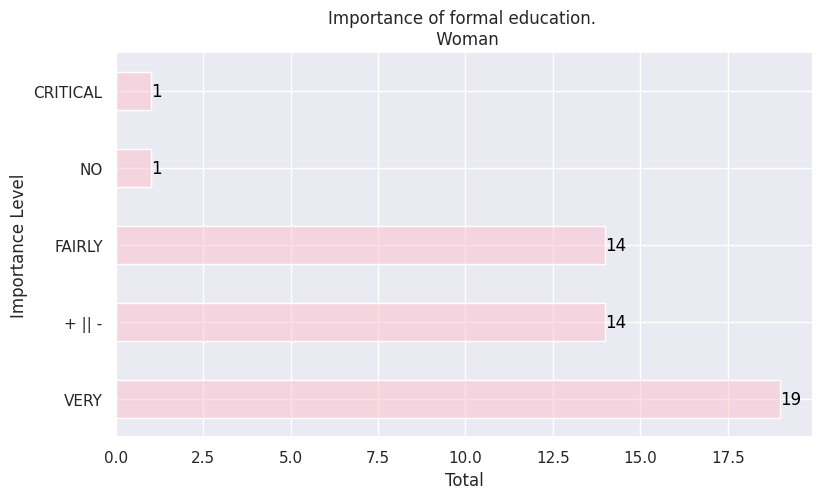

In [430]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = gen.get_group("WOMAN")["imp_ed_formal"].value_counts()
muj_import_plot = muj_import_df.plot(
    kind="barh",
    title="Importance of formal education. \n Woman",
    color=get_color("Female", "light"),
)

muj_import_plot.set_xlabel("Total")
muj_import_plot.set_ylabel("Importance Level")


for k, v in enumerate(gen.get_group("WOMAN")["imp_ed_formal"].value_counts().values):
    muj_import_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### EDUCACION - NO COMPARTO

In [431]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [432]:
gen.groups.keys()

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])

             categories  count
0            Autodidact      2
1  University Education      4
2         Middle School      3
3       Basic Education      2


/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 900x500 with 0 Axes>

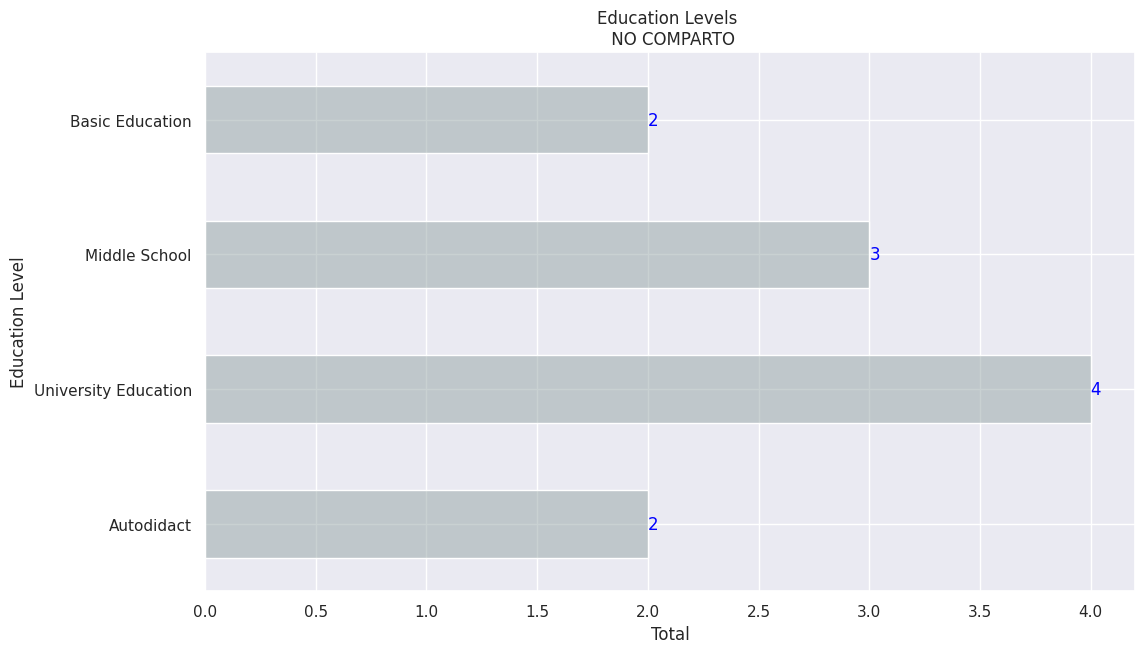

In [433]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = eh.make_df(
    gen.get_group("DONT SHARE"), "educacion", "categories", "count"
)

ed_no_comp_plot = ed_no_comp_df.plot(
    kind="barh",
    title="Education Levels \n NO COMPARTO",
    color=get_color("I do not share.", "light"),
    legend=False,
)


ed_no_comp_plot.set_xlabel("Total")
ed_no_comp_plot.set_ylabel("Education Level")

print(ed_no_comp_df)
ed_no_comp_plot.set_yticklabels([v for k, v in enumerate(ed_no_comp_df["categories"])])


for k, v in enumerate([i for i in ed_no_comp_df["count"]]):
    ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


          categoria  cuenta
0   System Analysis       3
1       Programming       2
2    Graphic design       1
3       Others Ing.       1
4  Eng. Electronics       1
5        Eng. Civil       1
6              None       1
7    Eng. Computing       1


<Figure size 900x500 with 0 Axes>

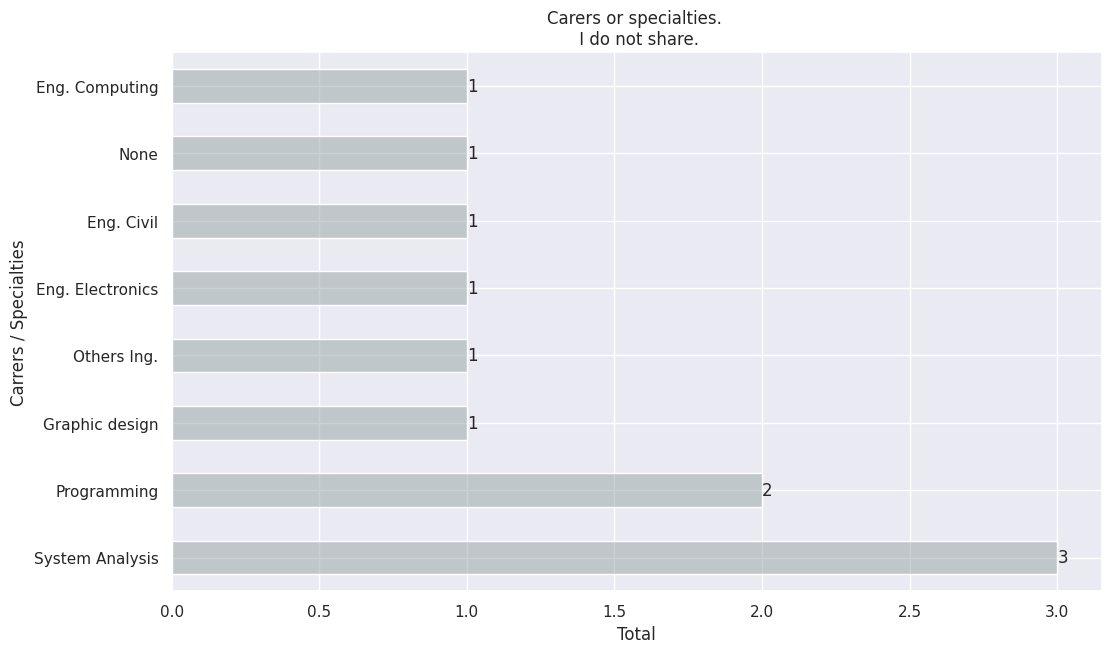

In [434]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = eh.make_df(
    gen.get_group("DONT SHARE"), "carr_especialidades", "categoria", "cuenta"
)
carr_no_comp_plot = carr_no_comp_df.plot(
    kind="barh",
    title="Carers or specialties. \n I do not share.",
    color=get_color("I do not share.", "light"),
    legend=False,
)


carr_no_comp_plot.set_xlabel("Total")
carr_no_comp_plot.set_ylabel("Carrers / Specialties")


print(carr_no_comp_df)
carr_no_comp_plot.set_yticklabels(
    [v for k, v in enumerate(carr_no_comp_df["categoria"])]
)


for k, v in enumerate([i for i in carr_no_comp_df["cuenta"]]):
    carr_no_comp_plot.annotate(v, (v, k), va="center")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

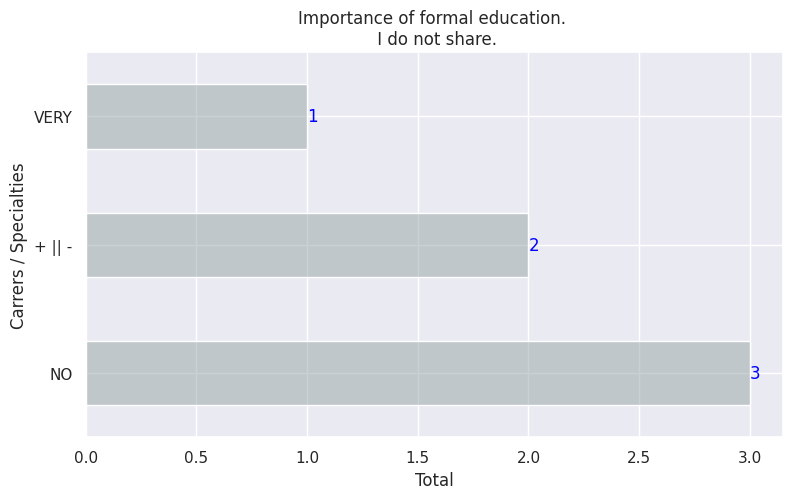

In [435]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp_df = gen.get_group("DONT SHARE")["imp_ed_formal"].value_counts()
imp_ed_no_comp_plot = imp_ed_no_comp_df.plot(
    kind="barh",
    title="Importance of formal education. \n I do not share.",
    color=get_color("I do not share.", "light"),
)


imp_ed_no_comp_plot.set_xlabel("Total")
imp_ed_no_comp_plot.set_ylabel("Carrers / Specialties")


for k, v in enumerate(
    [i for i in gen.get_group("DONT SHARE")["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [436]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

# IMPORTANCIA DE LA EDUCACION FORMAL - COMPARATIVAS

columna --------> 'imp_ed_formal'

In [437]:
generos = gen.groups.keys()
plt.figure(figsize=(4, 20), dpi=80)

<Figure size 320x1600 with 0 Axes>

<Figure size 320x1600 with 0 Axes>

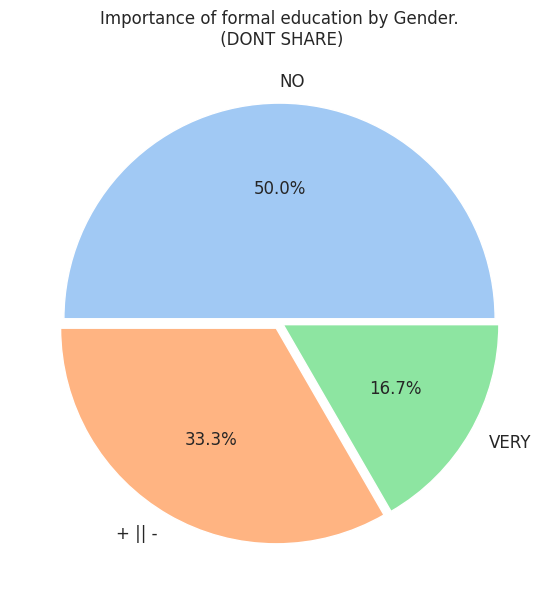

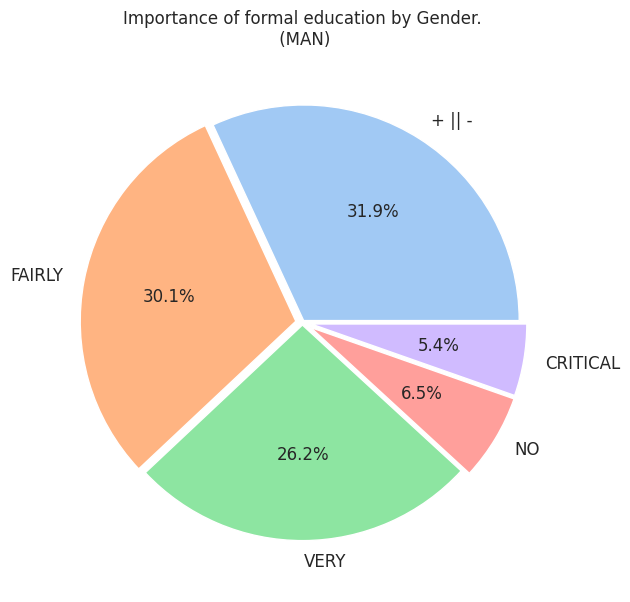

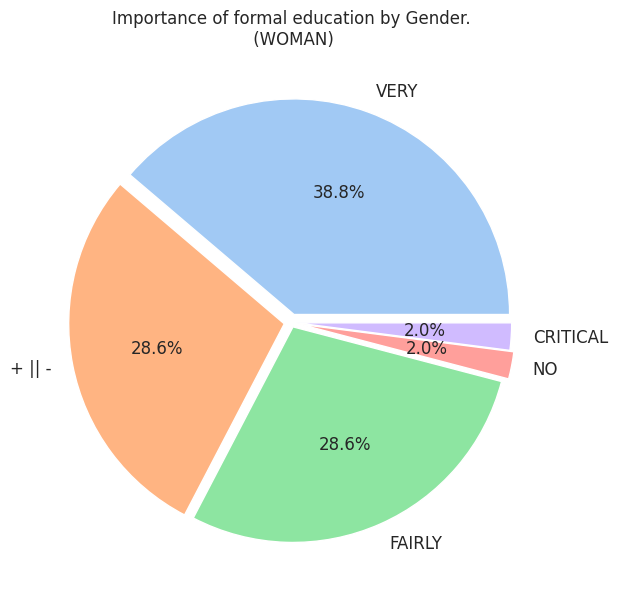

In [438]:
for k, v in enumerate(generos):
    # plt.subplot(2, 2, k + 1)
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    ie_plot = ie_df.plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        explode=eh.explode_pie(ie_df.size),
        textprops={"fontsize": 12},
        title=f"Importance of formal education by Gender.\n ({v})",
    )
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.3, wspace=0.4, hspace=0.4)

In [439]:
for k, v in enumerate(generos):
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    print(f"Gender : {v}\nImportance of formal education.")
    print("=" * 33)
    print(eh.percentage_to_normal(ie_df))
    print("\n" * 4)

Gender : DONT SHARE
Importance of formal education.
imp_ed_formal
NO        50.0 %
+ || -    33.3 %
VERY      16.7 %
Name: proportion, dtype: object





Gender : MAN
Importance of formal education.
imp_ed_formal
+ || -      31.9 %
FAIRLY      30.1 %
VERY        26.2 %
NO           6.5 %
CRITICAL     5.4 %
Name: proportion, dtype: object





Gender : WOMAN
Importance of formal education.
imp_ed_formal
VERY        38.8 %
+ || -      28.6 %
FAIRLY      28.6 %
NO           2.0 %
CRITICAL     2.0 %
Name: proportion, dtype: object







## Education 
    (Column name 'educacion'.)

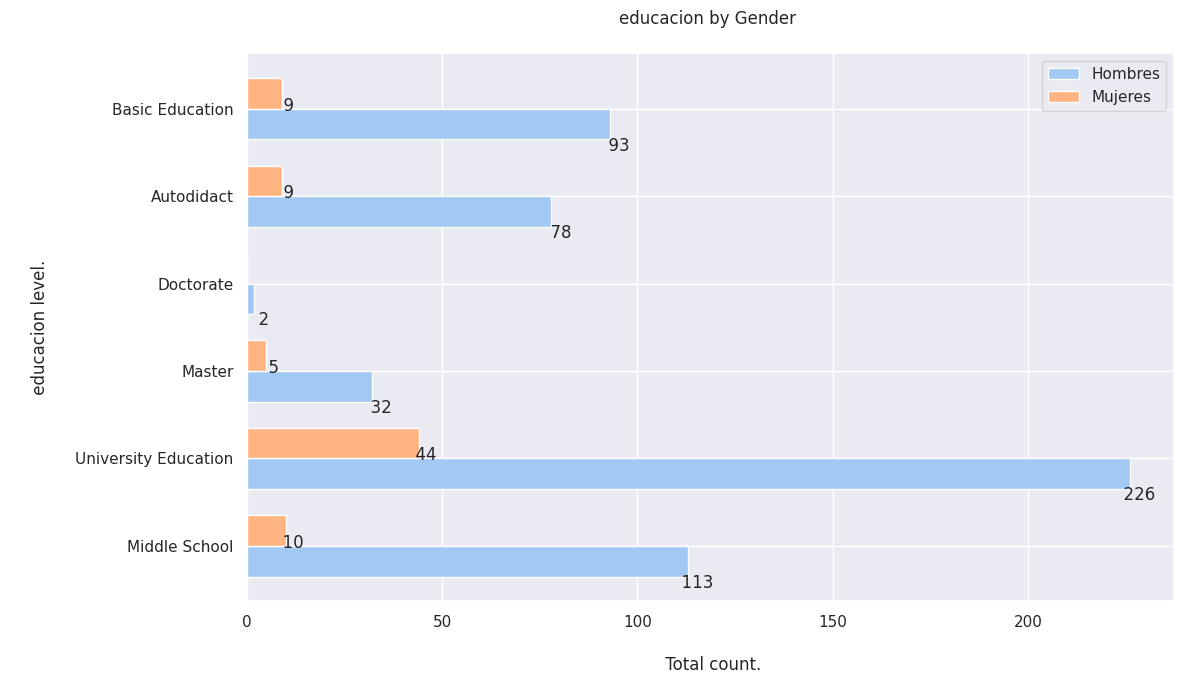

In [440]:
group_config = {
    "title": "educacion by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n educacion level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "educacion",
    eh.get_column_uniques(df, "educacion"),
    group_config,
)

## Carreras o especialidades.
   - Column name 'carr_especialidades'.

# carr_especialidades

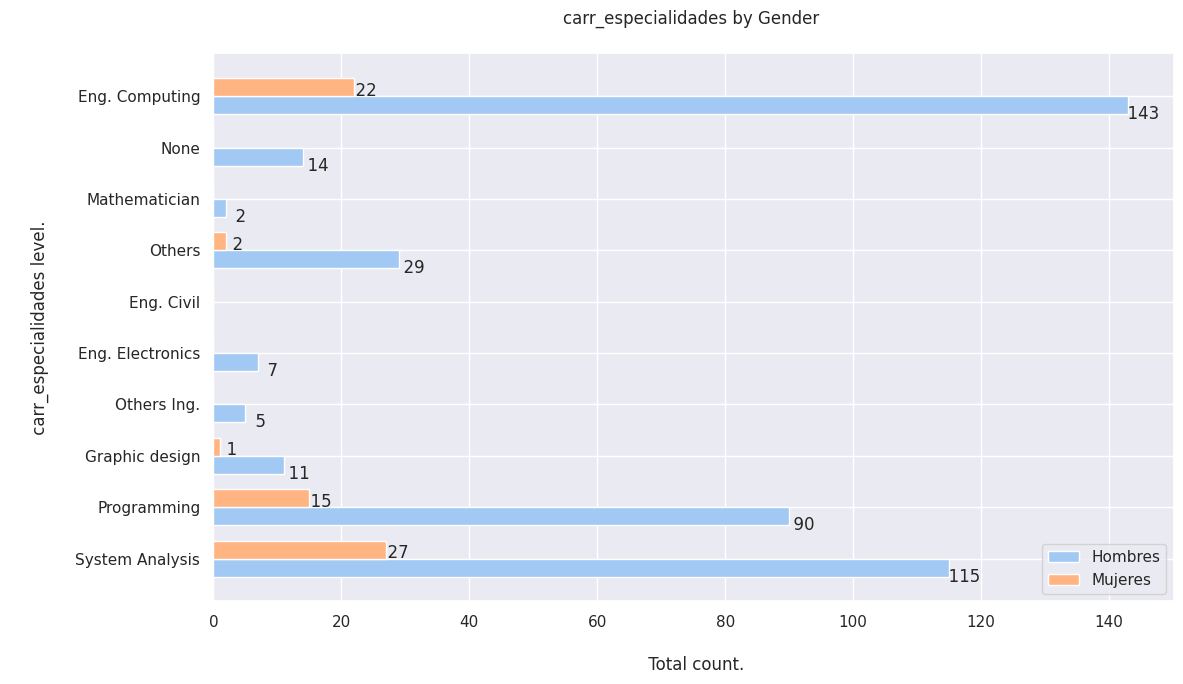

In [441]:
group_config = {
    "title": "carr_especialidades by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n carr_especialidades level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "carr_especialidades",
    eh.get_column_uniques(df, "carr_especialidades"),
    group_config,
)

# edad_actual

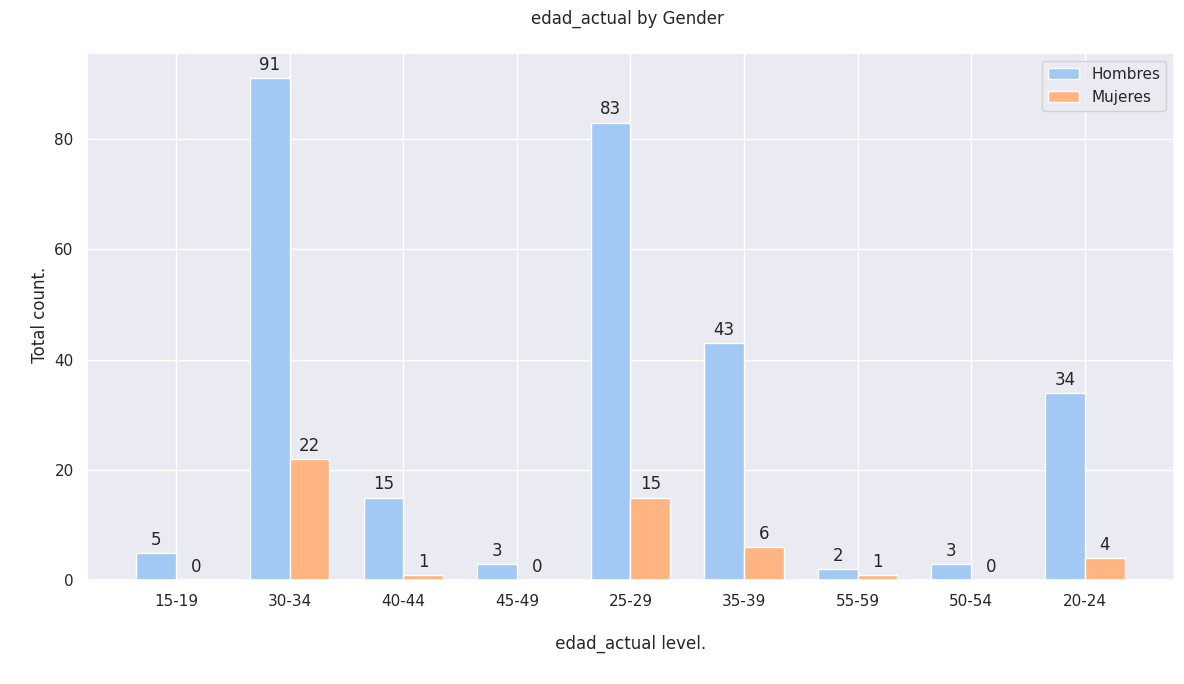

In [442]:
group_config = {
    "title": "edad_actual by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n edad_actual level. \n",
    "ylabel": "\n Total count.",
}

eh.make_vertical_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "edad_actual",
    eh.get_column_uniques(df, "edad_actual"),
    group_config,
)

In [443]:
print("HOMBRES ", gen.get_group("MAN").fillna("")["edad_actual"].value_counts())
print("\n" * 3)
print("MUJERES ", gen.get_group("WOMAN").fillna("")["edad_actual"].value_counts())

HOMBRES  edad_actual
30-34    91
25-29    83
35-39    43
20-24    34
40-44    15
15-19     5
45-49     3
50-54     3
55-59     2
Name: count, dtype: int64




MUJERES  edad_actual
30-34    22
25-29    15
35-39     6
20-24     4
55-59     1
40-44     1
Name: count, dtype: int64


# salario_mensual


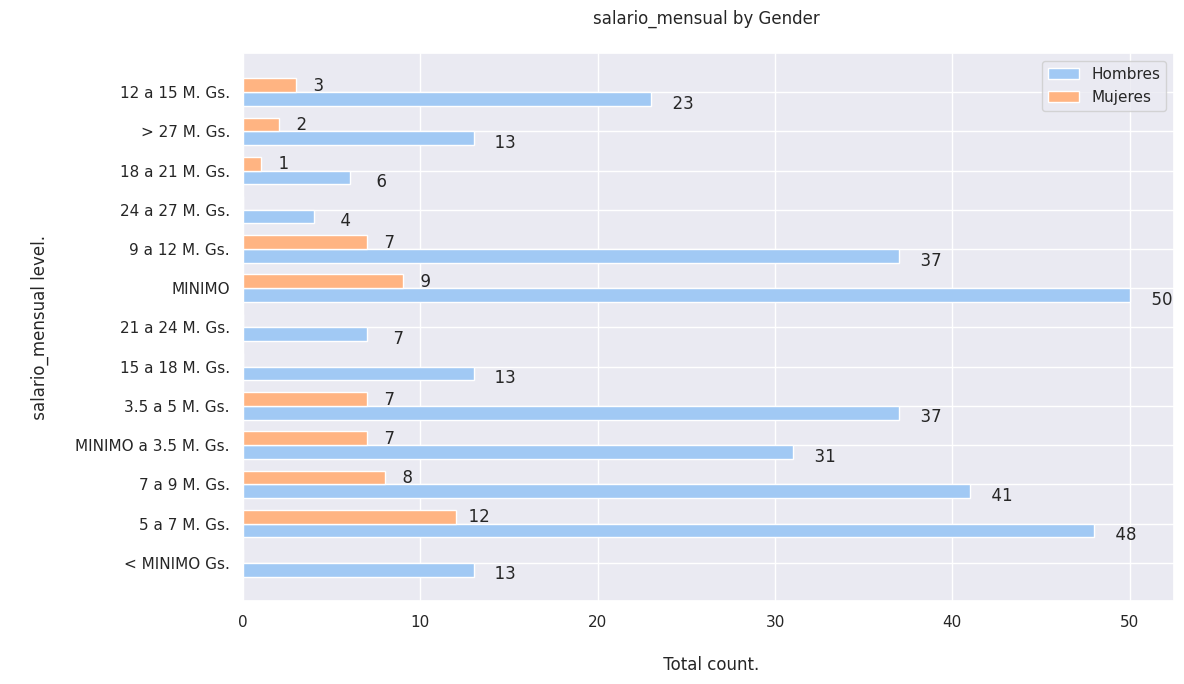

In [444]:
group_config = {
    "title": "salario_mensual by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n salario_mensual level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "salario_mensual",
    eh.get_column_uniques(df, "salario_mensual"),
    group_config,
)

# TEST COMPARATIVE CHARTS

In [445]:
for i in df.columns:
    print(i)

marca_temp
modalidad
trabajo
tipo_de_trabajo
devops
programar_x_trabajo
exp_en_IT
exp_en_programacion
1_linea_de_codigo
educacion
carr_especialidades
imp_ed_formal
genero
edad_actual
salario_mensual
prog_script_leng
lib_frameworks
otras_lib_frameworks
db
plataformas
leng_fav
leng_mas_odiado
fram_fav
fram_mas_odiado
herramientas


In [446]:
eh.get_column_uniques(df, "trabajo")

['Ambas', 'Nacional (Paraguay)', 'Internacional']

In [447]:
gen.groups.keys()

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])

In [448]:
count_modalidad_hombres = eh.get_uniques_col_count(gen.get_group("MAN"), "modalidad")

In [449]:
count_modalidad_mujeres = eh.get_uniques_col_count(gen.get_group("WOMAN"), "modalidad")

In [450]:
modalidad_labels = eh.get_column_uniques(df, "modalidad")

In [451]:
print("MODALIDAD LABELS -> ", modalidad_labels)
print("MOD COUNT HOMBRES -< ", count_modalidad_hombres)
print("MOD COUNT MUJERES -< ", count_modalidad_mujeres)

MODALIDAD LABELS ->  ['Ninguna', 'Remoto', 'Presencial', 'Hibrído']
MOD COUNT HOMBRES -<  {'Ninguna': 8, 'Remoto': 117, 'Presencial': 60, 'Hibrído': 94}
MOD COUNT MUJERES -<  {'Remoto': 20, 'Presencial': 18, 'Hibrído': 11}


In [452]:
men_val = [count_modalidad_hombres.get(i, 0) for i in modalidad_labels]

In [453]:
women_val = [count_modalidad_mujeres.get(i, 0) for i in modalidad_labels]

In [454]:
men_val

[8, 117, 60, 94]

In [455]:
women_val

[0, 20, 18, 11]

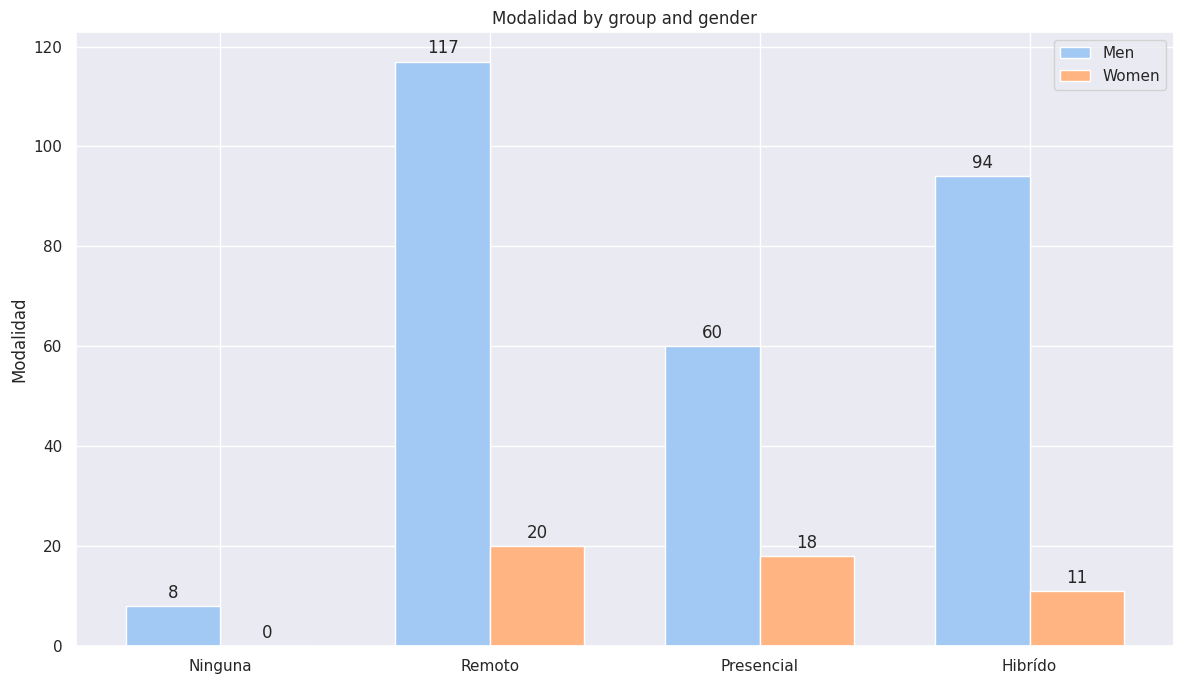

In [456]:
labels = eh.get_column_uniques(df, "modalidad")
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, men_val, width, label="Men")
rects2 = ax.bar(x + width / 2, women_val, width, label="Women")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Modalidad")
ax.set_title("Modalidad by group and gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

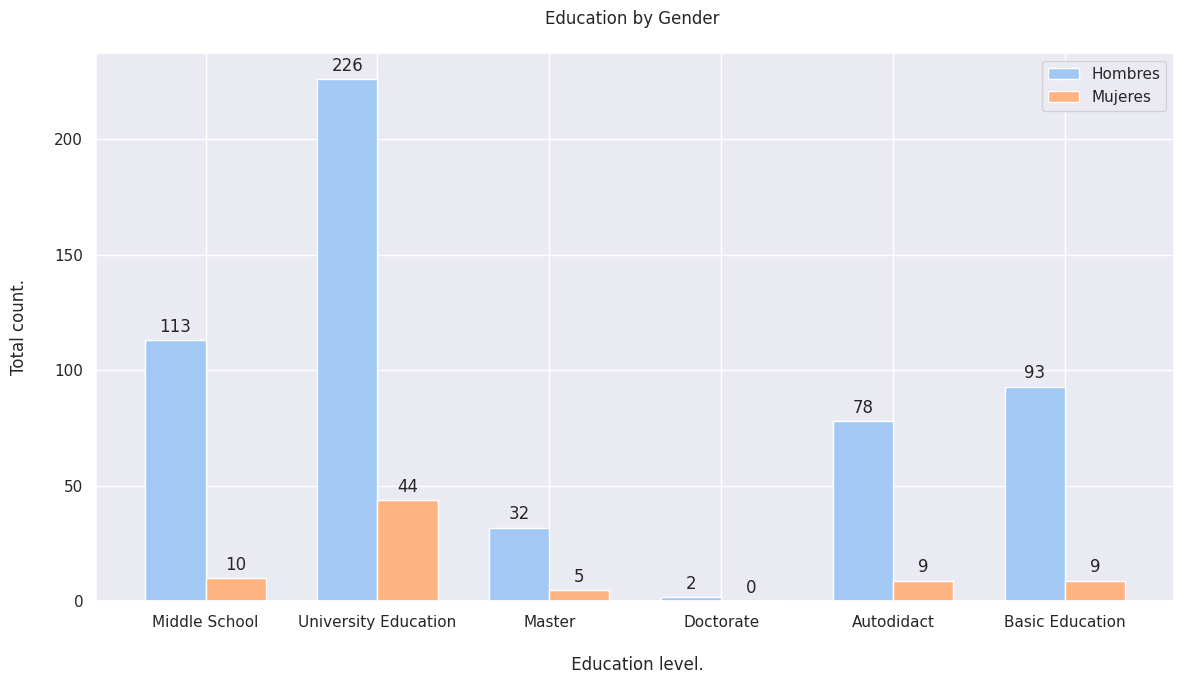

In [457]:
group_config = {
    "title": "Education by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n Education level.",
    "ylabel": "Total count.\n",
}

eh.make_vertical_grouped_chart(
    df,
    gen.get_group("MAN"),
    gen.get_group("WOMAN"),
    "educacion",
    eh.get_column_uniques(df, "educacion"),
    group_config,
)

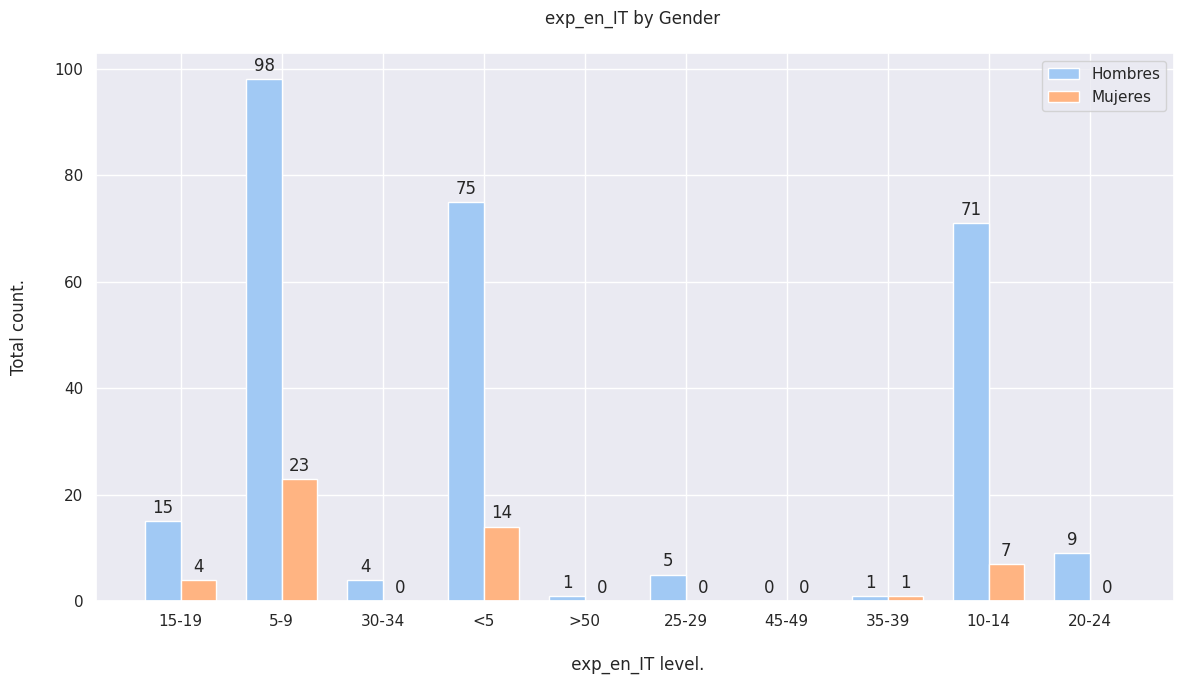

In [458]:
group_config = {
    "title": "exp_en_IT by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n exp_en_IT level.",
    "ylabel": "Total count.\n",
}

eh.make_vertical_grouped_chart(
    df,
    gen.get_group("MAN"),
    gen.get_group("WOMAN"),
    "exp_en_IT",
    eh.get_column_uniques(df, "exp_en_IT"),
    group_config,
)

In [459]:
df["leng_mas_odiado"].dropna(inplace=True)

In [460]:
eh.get_column_uniques(df, "1_linea_de_codigo")

['20-21',
 '12-13',
 '22-23',
 '<10',
 '26-27',
 '18-19',
 '14-15',
 '10-11',
 '28-29',
 '>30',
 '24-25',
 '16-17']

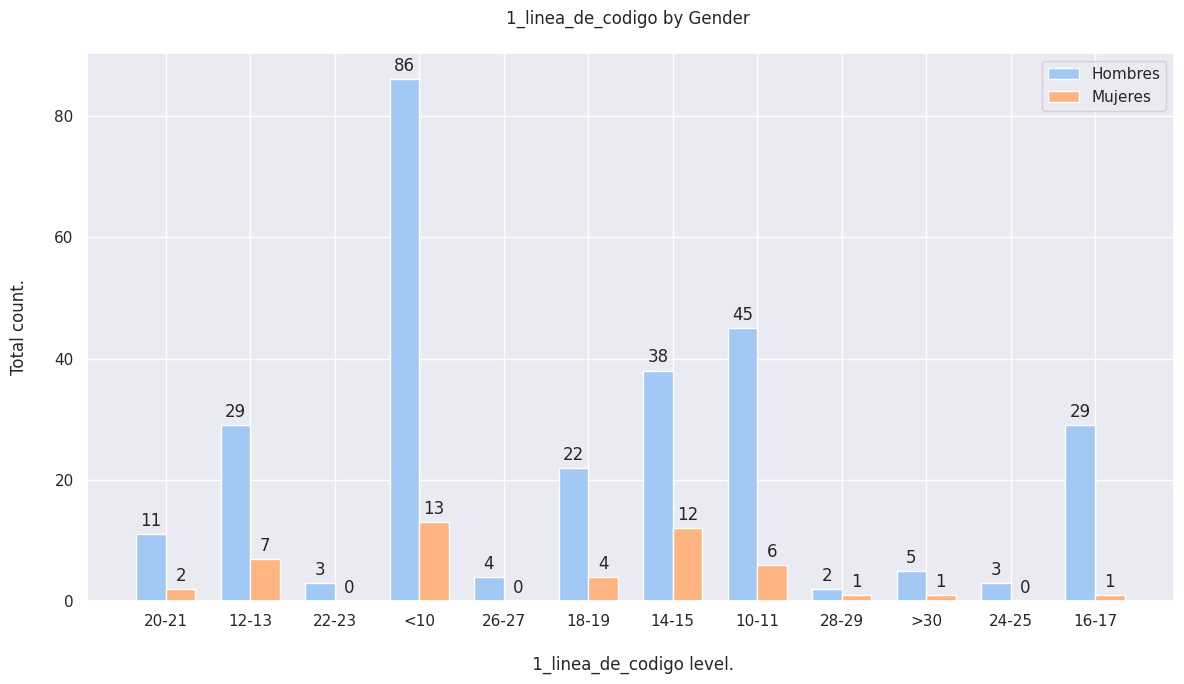

In [461]:
group_config = {
    "title": "1_linea_de_codigo by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n 1_linea_de_codigo level.",
    "ylabel": "Total count.\n",
}

eh.make_vertical_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "1_linea_de_codigo",
    eh.get_column_uniques(df, "1_linea_de_codigo"),
    group_config,
)

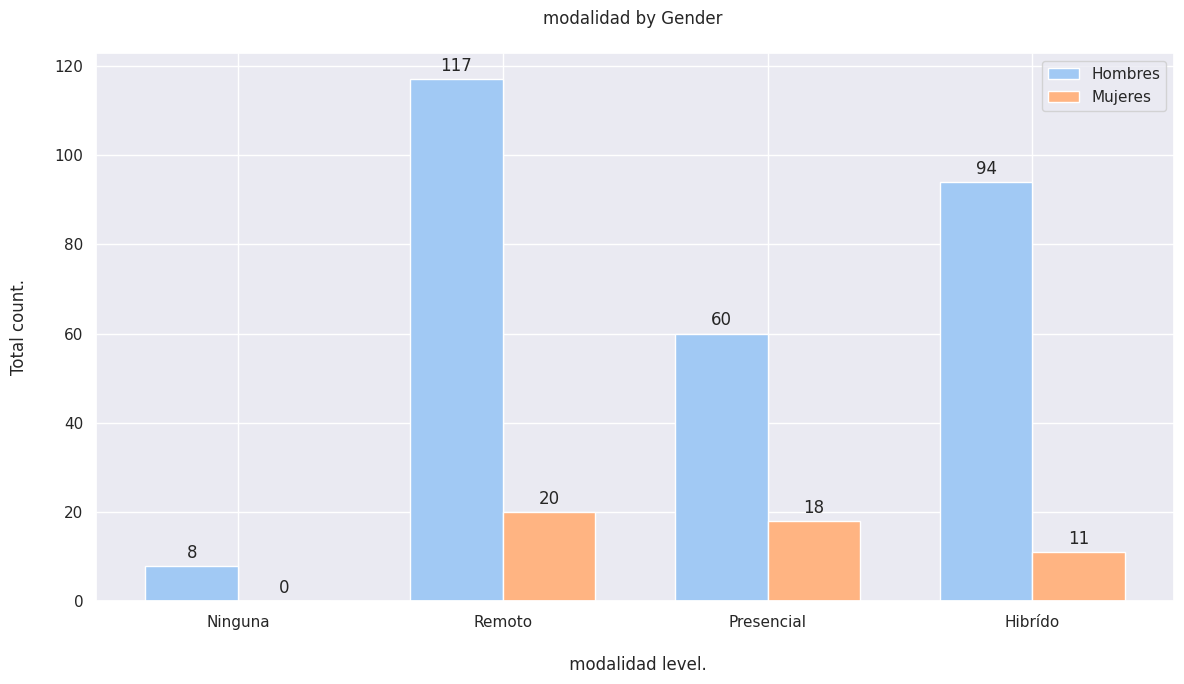

In [462]:
group_config = {
    "title": "modalidad by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n modalidad level.",
    "ylabel": "Total count.\n",
}

eh.make_vertical_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "modalidad",
    eh.get_column_uniques(df, "modalidad"),
    group_config,
)

In [463]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

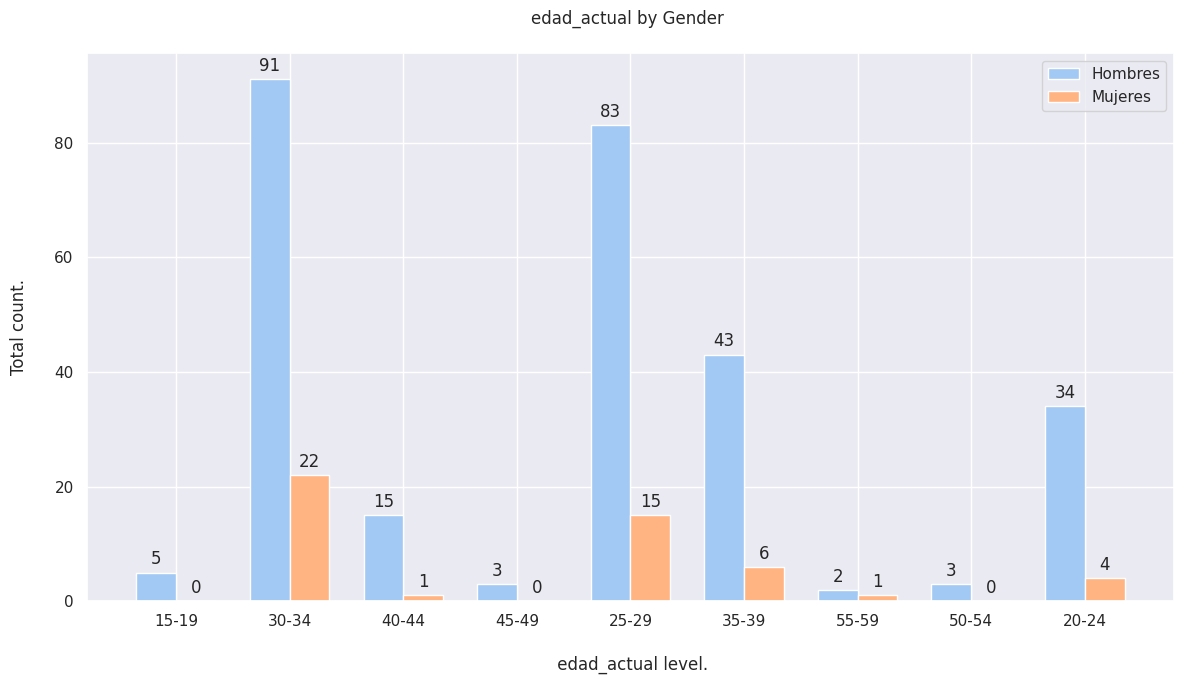

In [464]:
group_config = {
    "title": "edad_actual by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n edad_actual level.",
    "ylabel": "Total count.\n",
}

eh.make_vertical_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "edad_actual",
    eh.get_column_uniques(df, "edad_actual"),
    group_config,
)

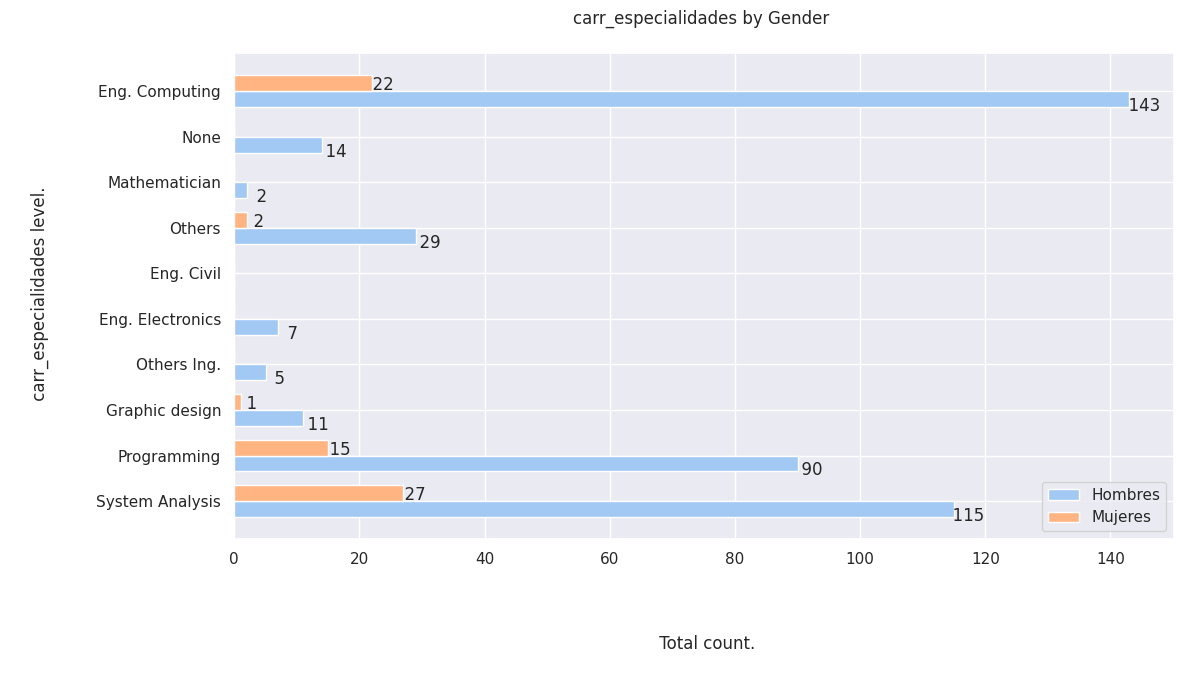

In [465]:
group_config = {
    "title": "carr_especialidades by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n carr_especialidades level.\n \n",
    "ylabel": "\n \n \n Total count.\n",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "carr_especialidades",
    eh.get_column_uniques(df, "carr_especialidades"),
    group_config,
)

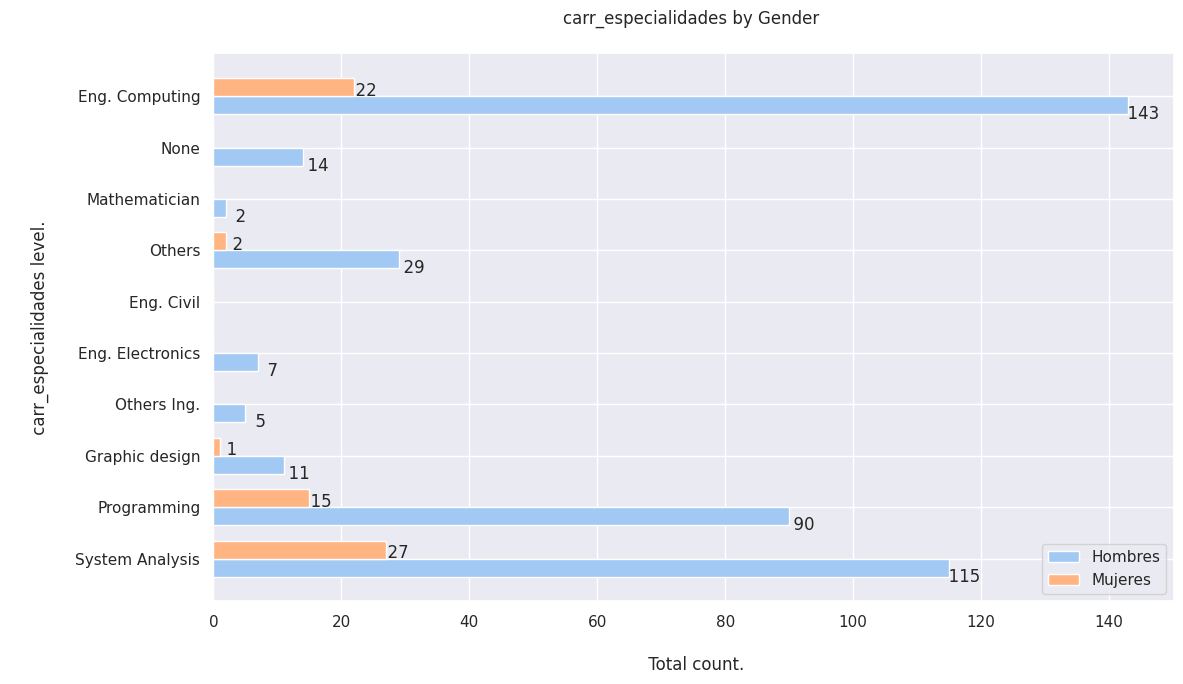

In [466]:
group_config = {
    "title": "carr_especialidades by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n carr_especialidades level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "carr_especialidades",
    eh.get_column_uniques(df, "carr_especialidades"),
    group_config,
)

In [467]:
print(
    "MAN ",
    eh.get_uniques_col_count(gen.get_group("MAN").fillna(""), "carr_especialidades"),
)
print("\n" * 3)
# print("WOMAN -> ", gen.get_group('WOMAN').fillna('')["carr_especialidades"].value_counts())

MAN  {'System Analysis': 115, 'Programming': 90, 'Graphic design': 11, 'Others Ing.': 5, 'Eng. Electronics': 7, 'Others': 29, 'Mathematician': 2, 'None': 14, 'Eng. Computing': 143}






In [468]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

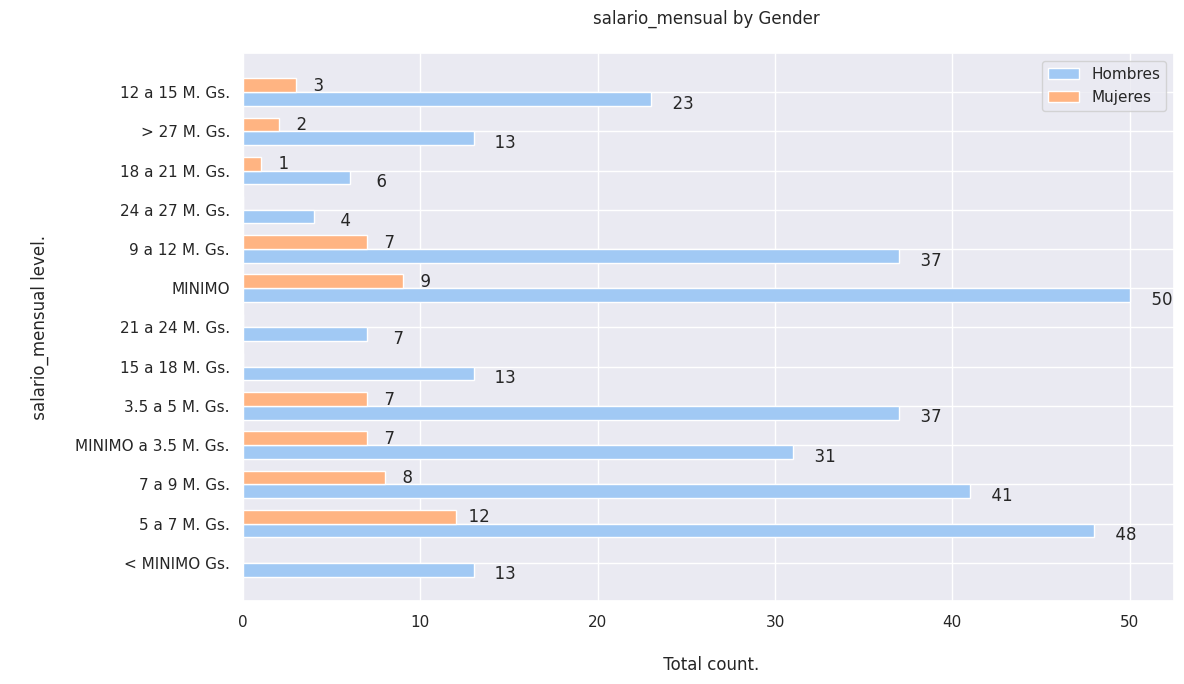

In [469]:
# salario_mensual
group_config = {
    "title": "salario_mensual by Gender \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n salario_mensual level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "salario_mensual",
    eh.get_column_uniques(df, "salario_mensual"),
    group_config,
)

# Segun el sueldo.

In [470]:
group_sueldos = df.groupby("salario_mensual")

In [471]:
group_sueldos.groups.keys()

dict_keys(['12 a 15 M. Gs.', '15 a 18 M. Gs.', '18 a 21 M. Gs.', '21 a 24 M. Gs.', '24 a 27 M. Gs.', '3.5 a 5 M. Gs.', '5 a 7 M. Gs.', '7 a 9 M. Gs.', '9 a 12 M. Gs.', '< MINIMO Gs.', '> 27 M. Gs.', 'MINIMO', 'MINIMO a 3.5 M. Gs.'])

In [472]:
 for i in group_sueldos.groups.keys():
    print('\n'*2)
    print('='*33)
    print(f'EDUCACION - SUELDO {i}')
    print('='*33)
    df1 =group_sueldos.get_group(i).fillna('')
    df2 = group_sueldos.get_group(i).fillna('')
     
 
    d1 = eh.make_normalized_df(df1.loc[df['genero']=='MAN'],'educacion')
    d2 = eh.make_normalized_df(df2.loc[df['genero']=='WOMAN'],'educacion')
    print('MAN ', d1)
    print('='*33)
    print('WOMAN ', d2)
 




EDUCACION - SUELDO 12 a 15 M. Gs.
MAN                        total count
categories                       
University Education    43.181818
Autodidact              18.181818
Middle School           13.636364
Master                  13.636364
Basic Education         11.363636
WOMAN                        total count
categories                       
University Education    66.666667
Master                  33.333333



EDUCACION - SUELDO 15 a 18 M. Gs.
MAN                        total count
categories                       
University Education    42.307692
Basic Education         15.384615
Middle School           15.384615
Master                  15.384615
Autodidact              11.538462
WOMAN  Empty DataFrame
Columns: [total count]
Index: []



EDUCACION - SUELDO 18 a 21 M. Gs.
MAN                        total count
categories                       
University Education    40.000000
Basic Education         20.000000
Middle School           20.000000
Autodidact              13.33

In [473]:
for i in group_sueldos.groups.keys():
    print("\n" * 2)
    print("=" * 33)
    print(f"MODALIDAD - SUELDO {i}")
    print("=" * 33)
    df1 = group_sueldos.get_group(i).fillna("")
    df2 = group_sueldos.get_group(i).fillna("")

    d1 = eh.make_normalized_df(df1.loc[df["genero"] == "MAN"], "modalidad")
    d2 = eh.make_normalized_df(df2.loc[df["genero"] == "WOMAN"], "modalidad")
    print("MAN ", d1)
    print("=" * 33)
    print("WOMAN ", d2)




MODALIDAD - SUELDO 12 a 15 M. Gs.
MAN              total count
categories             
Hibrído       65.217391
Remoto        17.391304
Presencial    17.391304
WOMAN              total count
categories             
Hibrído       33.333333
Presencial    33.333333
Remoto        33.333333



MODALIDAD - SUELDO 15 a 18 M. Gs.
MAN              total count
categories             
Hibrído       46.153846
Remoto        46.153846
Presencial     7.692308
WOMAN  Empty DataFrame
Columns: [total count]
Index: []



MODALIDAD - SUELDO 18 a 21 M. Gs.
MAN              total count
categories             
Remoto        66.666667
Presencial    16.666667
Hibrído       16.666667
WOMAN              total count
categories             
Hibrído           100.0



MODALIDAD - SUELDO 21 a 24 M. Gs.
MAN              total count
categories             
Remoto        42.857143
Hibrído       42.857143
Presencial    14.285714
WOMAN  Empty DataFrame
Columns: [total count]
Index: []



MODALIDAD - SUELDO 24 a 27 M. G

In [474]:
for i in group_sueldos.groups.keys():
    print("\n" * 2)
    print("=" * 33)
    print(f"GENERO - SUELDO {i}")
    print("=" * 33)
    df1 = group_sueldos.get_group(i).fillna("")
    df2 = group_sueldos.get_group(i).fillna("")

    d1 = eh.make_normalized_df(df1.loc[df["genero"] == "MAN"], "genero")
    d2 = eh.make_normalized_df(df2.loc[df["genero"] == "WOMAN"], "genero")
    print(d1)




GENERO - SUELDO 12 a 15 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 15 a 18 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 18 a 21 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 21 a 24 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 24 a 27 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 3.5 a 5 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 5 a 7 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 7 a 9 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO 9 a 12 M. Gs.
            total count
categories             
MAN               100.0



GENERO - SUELDO < MINIMO Gs.
            total c